<a href="https://colab.research.google.com/github/Shibli-Nomani/datascience/blob/main/Hw06Linear_KNN_Regression_and_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd # data frame library
import numpy as np
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
%matplotlib inline
path='/content/gdrive/MyDrive/AIQUEST ML Course/weight-height.csv'
df=pd.read_csv(path)
df.head(7)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889


In [3]:
df.shape


(8555, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [5]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [6]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

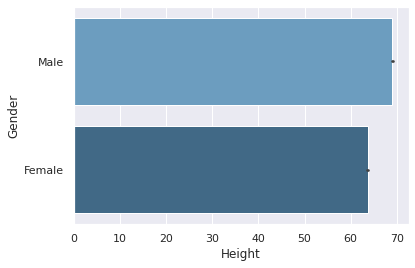

In [7]:
sns.set(style="darkgrid")
sns.barplot(x="Height", y="Gender", data=df,
                 palette="Blues_d")

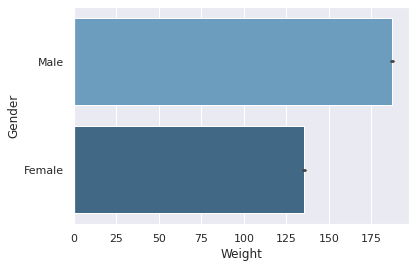

In [8]:
sns.barplot(x="Weight", y="Gender", data=df,
                 palette="Blues_d")

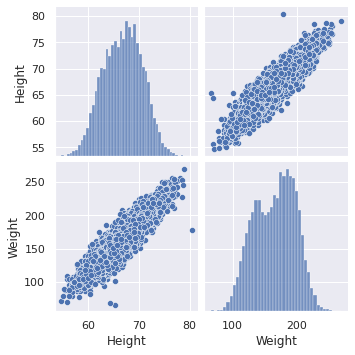

In [9]:
sns.pairplot(df, vars=["Height", "Weight"])


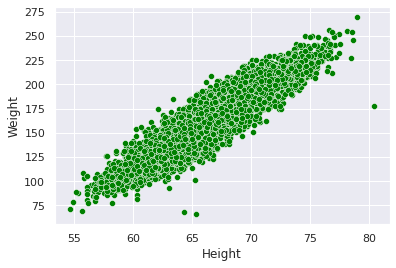

In [10]:
#Sactter Plot
sns.scatterplot(data=df, x="Height", y="Weight", color='green')

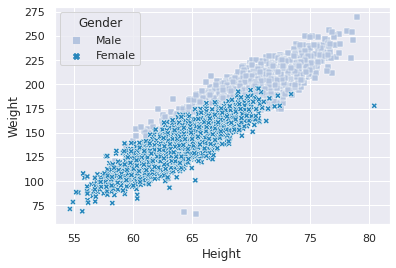

In [11]:
#Sactter Plot
markers = {"Male": "s", "Female": "X"}
sns.scatterplot(data=df, x="Height", y="Weight", hue= "Gender", palette="PuBu",style="Gender", markers=markers)
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,10

**String to Numeric Value Encoding**

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])

In [14]:
df.head(3)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856


In [15]:
df.Gender.unique()

array([1, 0])

**Devide the Dataset Features and Target**

In [16]:
#Target
y=df['Gender']
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [17]:
#Features
X= df.copy()
X=df.drop('Gender', axis=1)
X.head(5)


,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


**Splitting Data for Train and Test**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [19]:
X_train.count()

Height    5988
Weight    5988
dtype: int64

In [20]:
X_test.count()

Height    2567
Weight    2567
dtype: int64

#1. Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
le_r =  LinearRegression()
le_r.fit(X,y)

LinearRegression()

In [22]:
#value Coefficient or Slope
m= le_r.coef_
m

array([-0.04044776,  0.0166407 ])

In [23]:
#value y intercept
c= le_r.intercept_
c

0.5305205771003998

In [24]:
#Target prediction
y_pred = le_r.predict(X_test)
y_pred

array([ 0.39820561,  1.03312676,  0.6314282 , ..., -0.17883605,
        0.88899003, -0.03722967])

In [25]:
#male=1; female=0
X_test_sample=[[74.110105, 212.740856], [71.730978,	220.042470], [69.881796,	206.349801], [67.253016, 152.212156], [61.79309615,	129.781407],
[65.96801895,	156.8020826], [62.85037864,	114.9690383]] #In actual case, 1-4 male and 5-7 Female 

y_pred_sample=le_r.predict(X_test_sample)
y_pred_sample

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([ 1.07308974,  1.29082407,  1.13776373,  0.34320366,  0.19078181,
        0.47155851, -0.09847108])

In [26]:
#Accuracy Check
le_r.score(X_test , y_test)

0.651300010364372

In [27]:
#Accuracy Check
le_r.score(X_train , y_train)

0.6340523890904559

In [28]:
#Accuracy Check
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.651300010364372

In [29]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.08467166385987149

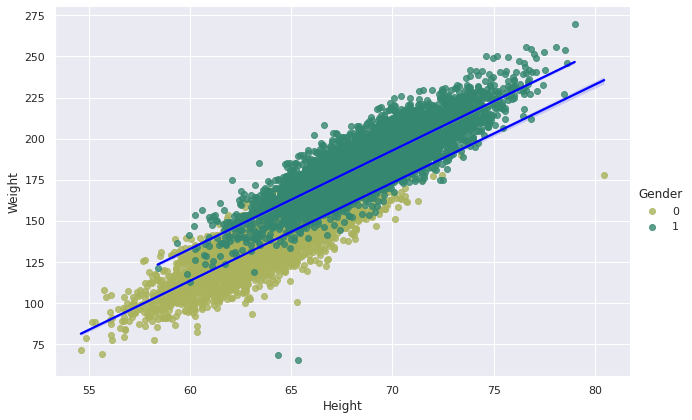

In [30]:
ax= sns.lmplot(
    data=df,
    x="Height", y="Weight", hue="Gender", line_kws={'color': 'blue'}, palette='gist_earth_r', height=6, aspect=1.5 )


#2. K-nearest neighbors (KNN) Regression



In [31]:
 from sklearn.neighbors import KNeighborsRegressor

In [32]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X,y)

KNeighborsRegressor(n_neighbors=2)

In [33]:
#Target prediction
y_pred = knr.predict(X_test)
y_pred

array([0., 1., 1., ..., 0., 1., 0.])

In [34]:
#Accuracy Check
knr.score(X_test , y_test)

0.8736606802469398

In [35]:
#Accuracy Check
knr.score(X_train , y_train)

0.8697066750748161

In [36]:
#Accuracy Check
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8736606802469398

In [37]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.030677834047526296

In [38]:
#male=1; female=0
X_test_sample=[[74.110105, 212.740856], [71.730978,	220.042470], [69.881796,	206.349801], [67.253016, 152.212156], [61.79309615,	129.781407],
[65.96801895,	156.8020826], [62.85037864,	114.9690383]] #In actual case, 1-4 male and 5-7 Female 

y_pred_sample_01=knr.predict(X_test_sample)
y_pred_sample_01

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([1. , 1. , 1. , 0.5, 0. , 0.5, 0. ])

# **K-nearest neighbors (KNN) Regression with Optimization and Tunning**

**RandomizedSearchCV**

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
from sklearn.model_selection import RandomizedSearchCV

model = KNeighborsRegressor(n_neighbors=2)
k_range=list(range(5, 100, 50))
options=['uniform', 'distance']
param_grid=dict(n_neighbors=k_range, weights=options)

rand_search = RandomizedSearchCV(model,
                           param_grid)
rand_search.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(estimator=KNeighborsRegressor(n_neighbors=2),
                   param_distributions={'n_neighbors': [5, 55],
                                        'weights': ['uniform', 'distance']})

In [41]:
rand_search.best_score_

0.7323202896676622

In [42]:
rand_search.best_estimator_

KNeighborsRegressor(n_neighbors=55)

In [43]:
rand_search.best_params_

{'n_neighbors': 55, 'weights': 'uniform'}

In [44]:
rand_search_new = rand_search.best_estimator_

In [45]:
rand_search_new.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=55)

In [46]:
#Target prediction
y_pred = rand_search_new.predict(X_test)
y_pred

array([0.23636364, 1.        , 0.85454545, ..., 0.        , 1.        ,
       0.        ])

In [47]:
#Accuracy Check
rand_search_new.score(X_test , y_test)

0.746311308873385

In [48]:
#Accuracy Check
rand_search_new.score(X_train , y_train)

0.7436057841377175

In [49]:
#Accuracy Check
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.746311308873385

In [50]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.06160092979230988

In [51]:
#Prediction 
#male=1; female=0
X_test_sample=[[74.110105, 212.740856], [71.730978,	220.042470], [69.881796,	206.349801], [67.253016, 152.212156], [61.79309615,	129.781407],
[65.96801895,	156.8020826], [62.85037864,	114.9690383]] #In actual case, 1-4 male and 5-7 Female 

y_pred_sample_02=rand_search_new.predict(X_test_sample)
y_pred_sample_02

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([1.        , 1.        , 1.        , 0.16363636, 0.09090909,
       0.4       , 0.        ])

**Model Compare among Linear Regression,  KNN Regression and KNN Regression Optimized with RandomizedSearchCV**

In [52]:
lr = 'Accuracy of KNN Class'
knn_r = 'Accuracy of KNN'
knn_rs = 'Accuracy of KNN class using RandomizedSearchCV'
df1=pd.DataFrame([[lr,0.651300010364372],[knn_r, 0.8736606802469398], [knn_rs, 0.746311308873385]],
                 columns=['Accuracy', 'Value'])
df1

,Accuracy,Value
0,Accuracy of KNN Class,0.651300
1,Accuracy of KNN,0.873661
2,Accuracy of KNN class using RandomizedSearchCV,0.746311


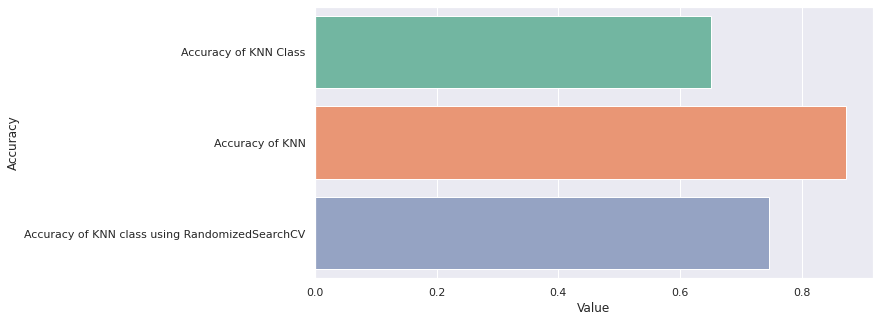

In [118]:
sns.set()
sns.barplot(x="Value", y="Accuracy",  data=df1, palette="Set2")
sns.set(rc={'figure.figsize':(10,5)})

#**KNN Classification Algorithm**

In [54]:
import pandas as pd # data frame library
import numpy as np
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
%matplotlib inline
path='/content/gdrive/MyDrive/AIQUEST ML Course/weight-height.csv'
df=pd.read_csv(path)
df.head(7)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889


In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [56]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])

In [57]:
#Target
y=df['Gender']
y

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int64

In [58]:
#Features
X=df.copy()
X=df.drop('Gender', axis=1)
X.head(3)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856


In [59]:
df.Gender.unique()

array([1, 0])

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_Train,y_test= train_test_split(X,y, train_size=0.70, random_state=42)

In [61]:
X_train.count()

Height    5988
Weight    5988
dtype: int64

In [62]:
X_test.count()

Height    2567
Weight    2567
dtype: int64

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_cl = KNeighborsClassifier(n_neighbors=7)

In [64]:
knn_cl.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [65]:
y_pred= knn_cl.predict(X_test)

In [66]:
print(y_pred)

[0 1 1 ... 0 1 0]


**1. Confusion Matrix**

In [67]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 948,  118],
       [  93, 1408]])

**Confusion Matrix Plot**

Text(30.5, 0.5, 'Actual Values')

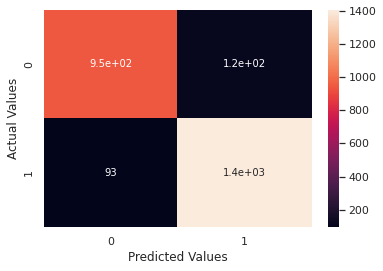

In [68]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

**Assign the TRUE POSITIVE, FALSE NEGATIVE, FALSE POSITIVE, TRUE NEGATIVE using Confsion Matrix**

In [69]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)

In [70]:
tp

948

In [71]:
fn

118

In [72]:
fp

93

In [73]:
tn

1408

**2. Accuracy**

In [74]:
accuracy = (tp+tn)/len(y_test)
accuracy


0.917802882742501

In [75]:
accuracy= (tp+tn)/(tp+fp+tn+fn)
accuracy

0.917802882742501

In [76]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.917802882742501

**Harmonic Mean or F1 Score**

In [77]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.89985762, 0.93029402])

**3. ROC and AUC Graph**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


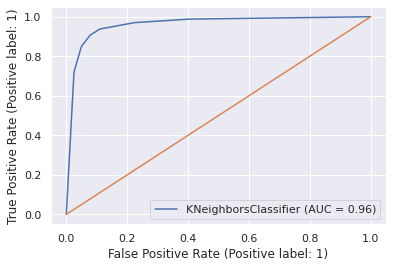

In [78]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn_cl,X_test, y_test)
plt.plot([0,1],[0,1])

**4. Classification Report Summary**

In [79]:
from sklearn.metrics import classification_report
class_r=classification_report(y_test, y_pred)
print(class_r)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1066
           1       0.92      0.94      0.93      1501

    accuracy                           0.92      2567
   macro avg       0.92      0.91      0.92      2567
weighted avg       0.92      0.92      0.92      2567



**For K-value selection**

In [80]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
k_range=range(1,26)
scores=[]

for k in k_range:
    knn_cl=KNeighborsClassifier(n_neighbors=k)
    knn_cl.fit(X_train, y_train)
    y_pred=knn_cl.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

**K Value and Accuracy Graph**

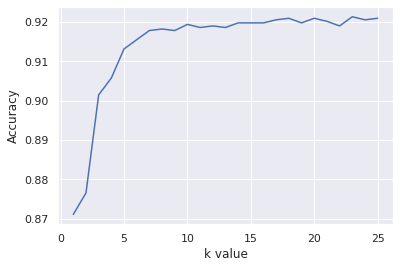

In [81]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('Accuracy')

plt.show()

**K-nearest neighbors (KNN) Classifier with Optimization and Tunning**

In [83]:
from sklearn.model_selection import RandomizedSearchCV
k_range=list(range(5, 100, 20))
options=['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=options)

In [84]:
record=KNeighborsClassifier()
rand = RandomizedSearchCV(record, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=42)
rand.fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [5, 55],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [85]:
rand.best_score_

0.9167740613215282

In [86]:
rand.best_params_

{'n_neighbors': 55, 'weights': 'distance'}

In [87]:
 rand.best_estimator_

KNeighborsClassifier(n_neighbors=55, weights='distance')

In [88]:
new_rand = rand.best_estimator_

In [89]:
new_rand.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=55, weights='distance')

In [90]:
y_pred_rs= new_rand.predict(X_test)

In [91]:
y_pred_rs

array([0, 1, 1, ..., 0, 1, 0])

In [92]:
new_rand.score(X_test, y_test)

0.9189715621347877

**1. Confusion Matrix**

In [93]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rs=confusion_matrix(y_test, y_pred_rs)

In [94]:
cm_rs

array([[ 957,  109],
       [  99, 1402]])

Text(30.5, 0.5, 'Actual Values')

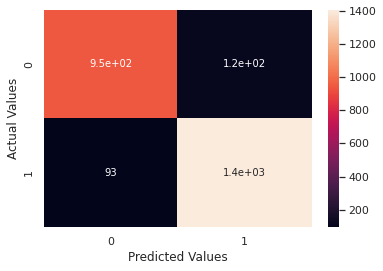

In [95]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

**Assign the TRUE POSITIVE, FALSE NEGATIVE, FALSE POSITIVE, TRUE NEGATIVE using Confsion Matrix**

In [96]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)

In [97]:
tp

958

In [98]:
fn

108

In [99]:
fp

95

In [100]:
tn

1406

**2. Accuracy**

In [101]:
accuracy = (tp+tn)/len(y_test)
accuracy

0.9209193611219322

In [102]:
accuracy= (tp+tn)/(tp+fp+tn+fn)
accuracy

0.9209193611219322

In [103]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred_rs)
accuracy

0.9189715621347877

**Harmonic Mean or F1 Score**

In [104]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_rs, average=None)


array([0.90197926, 0.9309429 ])

**3. ROC and AUC Graph**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


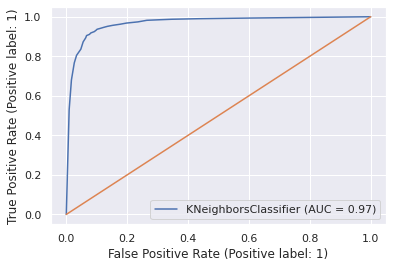

In [105]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn_cl,X_test, y_test)
plt.plot([0,1],[0,1])

**4. Classification Report Summary**

In [106]:
from sklearn.metrics import classification_report
class_rs=classification_report(y_test, y_pred_rs)
print(class_rs)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1066
           1       0.93      0.93      0.93      1501

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



**Compare Accuracy KNN and KNN with RandomizedSearchCV optimizer**

In [108]:
d = 'Accuracy of KNN Class'
r_rs = 'Accuracy of KNN class using RandomizedSearchCV'

df2=pd.DataFrame([[d,.917802882742501],[r_rs, 0.9209193611219322]],
                 columns=['Accuracy', 'Value'])
df2

,Accuracy,Value
0,Accuracy of KNN Class,0.917803
1,Accuracy of KNN class using RandomizedSearchCV,0.920919


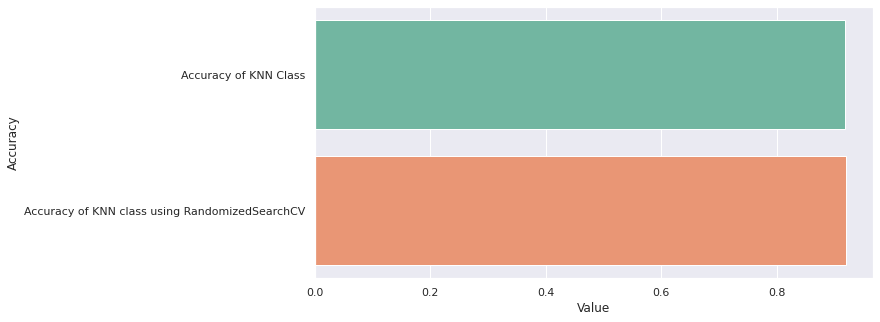

In [117]:
sns.barplot(x="Value", y="Accuracy",  data=df2, palette="Set2")
